随机0-1的小数 [0.32194286 0.33821022 0.6525111  0.13315546 0.02674288 0.23448546
 0.21536569 0.85761514 0.08452747 0.89884992]
随机0-9的数 4
x [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
x [array([0.08452747]), array([2.85761514]), array([4.08452747]), array([6.33821022]), array([8.85761514]), array([10.02674288]), array([12.02674288]), array([14.6525111]), array([16.23448546]), array([18.85761514]), array([20.02674288]), array([22.21536569]), array([24.02674288]), array([26.02674288]), array([28.23448546]), array([30.08452747]), array([32.08452747]), array([34.85761514]), array([36.21536569]), array([38.32194286])]
y [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y [array([0.33821022]), array([1.02674288]), array([2.6525111]), array([3.02674288]), array([4.23448546]), array([5.23448546]), array([6.08452747]), array([7.02674288]), array([8.85761514]), array([9.13315546]), array([10.13315546]), array([11.02674288]), array([12.85761514]), array([13.23448546]), arr

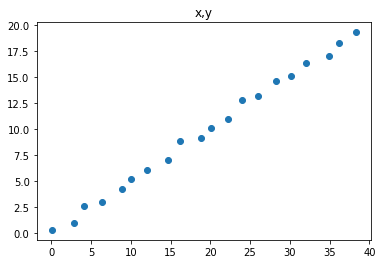

tensor(0.2382, device='cuda:0')
tensor(0.2269, device='cuda:0')
tensor(0.2168, device='cuda:0')
tensor(0.2077, device='cuda:0')
tensor(0.1994, device='cuda:0')
tensor(0.1920, device='cuda:0')
tensor(0.1854, device='cuda:0')
tensor(0.1793, device='cuda:0')
tensor(0.1739, device='cuda:0')
tensor(0.1691, device='cuda:0')


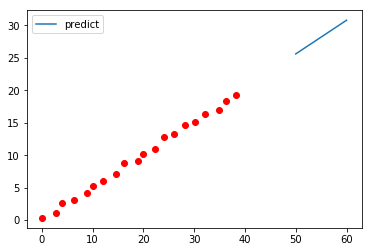

predicted (array([50.], dtype=float32), array([25.591965], dtype=float32)) (array([60.], dtype=float32), array([30.777382], dtype=float32))


In [129]:
#线性回归
import numpy
import matplotlib.pyplot as plt

randfloat=numpy.random.rand(10)
print("随机0-1的小数",randfloat)
index=numpy.random.randint(0,9,1)
print("随机0-9的数",index[0])

x=2*numpy.arange(20)
print("x",x)
x=[i+randfloat[numpy.random.randint(0,9,1)] for i in x]
print("x",x)


y=numpy.arange(20)
print("y",y)
y=[i+randfloat[numpy.random.randint(0,9,1)] for i in y]
print("y",y)

plt.figure()
plt.scatter(x,y)
plt.title("x,y")
plt.show()

x=numpy.array(x).astype(numpy.float32)
y=numpy.array(y).astype(numpy.float32)
# 利用torch做线性回归
import torch
import torch.nn  as nn
from torch.autograd import Variable

class Lrm(nn.Module):
    def __init__(self, input_size, output_size):
        super(Lrm, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, xx):
        out = self.linear(xx)
        return out

lrm = Lrm(input_size, output_size).cuda()

input_size = 1
output_size = 1
learning_rate = 0.001

# 误差函数
criterion=nn .MSELoss()
optimizer=torch.optim.SGD(lrm.parameters(),lr=learning_rate)

# 训练1000次
c=1000
for epoch in range(c):
    inputs=Variable(torch.from_numpy(x)).cuda()
    targets=Variable(torch.from_numpy(y)).cuda()
    # 注意每次迭代都需要清零
    optimizer.zero_grad()
    # 向前传播
    outputs=lrm(inputs)
    loss=criterion(outputs,targets)
    # 向后传播
    loss.backward()
    optimizer.step()
    if(epoch+1)%100==0:
        print(loss.data)
        
lrm.eval()

# 绘制原数据集
plt.plot(x, y, 'ro')
# 绘制预测
xx=numpy.array([numpy.array([50]).astype(numpy.float32),numpy.array([60]).astype(numpy.float32)])

predicted = lrm(Variable(torch.from_numpy(xx)).cuda())
predicted=predicted.data.cpu().numpy()
plt.plot(xx, predicted, label='predict')
plt.legend()
plt.show()

# 打印结果
print("predicted",(xx[0],predicted[0]),(xx[-1],predicted[-1]))